< DRAFT > Exploring use of Flickr API to Return Images of Species

Daniel Wieferich

Purpose: This effort explores the possibility of accessing images from Flickr of a species of interest.    Currently this is accessing data from a specific user. 

In [4]:
#Functions exploring use of flickrapi
#limit of 3600 queries per hour set by flickr so if used need to find ways to minimize calls to flickr api
#more info: https://www.flickr.com/services/developer/api/

import flickrapi
import requests
from PIL import Image
import io
import matplotlib.pyplot as plt
%matplotlib inline

#Search a users collection for photos with tag of a specified scientific name. 
#Create a list of photo info: urls (url_n is currently being used which is a smaller sized image having a smaller side of 320)

def specie_photo_list_flickr(flickr_api_key, flickr_api_secret, flickr_user_id, sci_name, max_num_photos):
    
    flickr=flickrapi.FlickrAPI(flickr_api_key, flickr_api_secret, cache=True)
    photos = flickr.walk(user_id= flickr_user_id,
       #              text=keyword,
                     tag_mode='all',
                     tags=sci_name,
                     extras='url_n',        #more info on extras options: http://joequery.me/code/flickr-api-image-search-python/
                     per_page=2,           # can try different numbers per page dependent on use..
                     sort='relevance')
    urls = []
    for i, photo in enumerate(photos):
        url = photo.get('url_n')
        #might be good to include author, date, location here 
        urls.append(url)
        
        #max number of photos to collect
        if i>max_num_photos:
            break
    
    return urls
            
def show_image(image_indx, urls):
    try:
        url = urls[image_indx]
        data = requests.get(url).content
        img = Image.open(io.BytesIO(data))
        plt.imshow(img)
        return plt.show()
    except:
        return 'no image available'

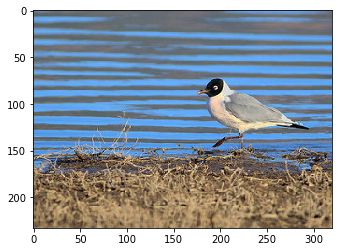

In [8]:
#Example of using photos from flickr based on scientific name search
import os
flickr_api_key = os.environ['flickr_api_key']
flickr_api_secret = os.environ['flickr_api_key']
flickr_user_id = os.environ['flickr_user_id']
sci_name = 'leucophaeus pipixcan'
image_indx = 0

urls = specie_photo_list_flickr(flickr_api_key, flickr_api_secret, flickr_user_id, sci_name, 1)
show_image(image_indx, urls)

In [ ]:
#More info:  Line 130 https://github.com/sybrenstuvel/flickrapi/blob/master/flickrapi/core.py
#flicker sizes: http://joequery.me/code/flickr-api-image-search-python/